In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter

In [ ]:
d5 = pd.read_csv('/content/data_5_1.csv');
d4_2 = pd.read_csv('/content/data_4_2.csv');
d4_3 = pd.read_csv('/content/data_4_3.csv');
d4_4 = pd.read_csv('/content/data_4_4.csv');

Просмотрим информацию и описание каждого датасета. Помним, что 5_1 - эталон (без дефектов), 4_2 - несоосность в муфте, 4_3 - наличие дисбаланса, 4_4 - втулка с дефектами.

In [ ]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15938 entries, 0 to 15937
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Fluctuations_X_in_the_left_bearing          15938 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          15938 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         15938 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         15938 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   15938 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   15938 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  15937 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  15937 non-null  float64
 8   Temperature_in_the_left_bearing             15937 non-null  float64
 9   Temperature_in_the_right_bearing            15937 non-null  float64
dtypes: float64

In [ ]:
d5.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15937.000000,15937.000000,15937.000000,15937.000000
mean,5.455373,6.344737,5.696288,7.227978,5.455440,6.344740,5.696269,7.228039,1093.101959,1101.189203
std,0.085220,0.099531,0.080140,0.077448,0.071926,0.080896,0.065838,0.063451,1.124549,0.437155
min,5.085000,5.875000,5.332000,6.800000,5.208000,6.111000,5.516000,7.059000,1091.353000,1100.433000
25%,5.387000,6.271000,5.640000,7.172000,5.390000,6.274000,5.640000,7.173000,1091.964000,1100.768000
50%,5.463000,6.341000,5.696000,7.221000,5.466000,6.340000,5.695000,7.219000,1093.009000,1101.194000
75%,5.521000,6.420000,5.754000,7.285000,5.520000,6.417000,5.749000,7.282000,1093.974000,1101.534000
max,6.066000,7.065000,6.296000,7.935000,5.721000,6.682000,6.001000,7.473000,1094.922000,1101.836000


In [ ]:
d4_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15881 entries, 0 to 15880
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Fluctuations_X_in_the_left_bearing          15881 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          15881 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         15881 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         15881 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   15881 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   15881 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  15881 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  15881 non-null  float64
 8   Temperature_in_the_left_bearing             15881 non-null  float64
 9   Temperature_in_the_right_bearing            15881 non-null  float64
dtypes: float64

In [ ]:
d4_2.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000
mean,4.980129,6.652082,5.800762,7.338787,4.980167,6.652022,5.800729,7.338763,1100.862895,1101.359118
std,0.068138,0.106727,0.088548,0.078781,0.049611,0.089571,0.075240,0.063698,0.078243,7.884325
min,4.612000,6.150000,5.394000,6.960000,4.792000,6.406000,5.593000,7.076000,1100.641000,110.000000
25%,4.933000,6.574000,5.739000,7.283000,4.941000,6.575000,5.740000,7.284000,1100.852000,1100.889000
50%,4.991000,6.636000,5.799000,7.327000,4.992000,6.634000,5.796000,7.325000,1100.871000,1101.350000
75%,5.021000,6.734000,5.864000,7.395000,5.016000,6.732000,5.861000,7.393000,1100.928000,1101.827000
max,5.506000,7.378000,6.412000,7.972000,5.185000,6.991000,6.064000,7.623000,1100.951000,1102.307000


In [ ]:
d4_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15911 entries, 0 to 15910
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Fluctuations_X_in_the_left_bearing          15911 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          15911 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         15911 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         15911 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   15911 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   15911 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  15911 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  15911 non-null  float64
 8   Temperature_in_the_left_bearing             15911 non-null  float64
 9   Temperature_in_the_right_bearing            15910 non-null  float64
dtypes: float64

In [ ]:
d4_3.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15910.000000
mean,5.457741,6.352916,5.687591,7.174595,5.457720,6.353006,5.687638,7.174548,1098.544853,1100.487798
std,0.094437,0.104715,0.080204,0.077760,0.082076,0.087667,0.065705,0.064120,8.712680,0.084629
min,5.065000,5.916000,5.254000,6.745000,5.254000,6.068000,5.438000,6.958000,1.000000,1100.383000
25%,5.381000,6.273000,5.625000,7.116000,5.381000,6.274000,5.629000,7.118000,1098.174000,1100.403000
50%,5.456000,6.351000,5.694000,7.183000,5.459000,6.352000,5.696000,7.184000,1098.538000,1100.464000
75%,5.537000,6.436000,5.747000,7.229000,5.535000,6.432000,5.744000,7.228000,1098.955000,1100.546000
max,6.090000,7.047000,6.218000,7.824000,5.674000,6.641000,5.985000,7.418000,1099.365000,1100.646000


In [ ]:
d4_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15897 entries, 0 to 15896
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Fluctuations_X_in_the_left_bearing          15897 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          15897 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         15897 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         15897 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   15896 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   15896 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  15896 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  15896 non-null  float64
 8   Temperature_in_the_left_bearing             15896 non-null  float64
 9   Temperature_in_the_right_bearing            15896 non-null  float64
dtypes: float64

In [ ]:
d4_4.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15897.000000,15897.000000,15897.000000,15897.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000
mean,5.342380,6.475073,6.015417,7.074813,5.342302,6.475212,6.015500,7.074803,1094.240086,1088.497439
std,0.092487,0.082749,0.073408,0.072017,0.079210,0.058560,0.058873,0.054467,1.015809,1.677794
min,4.969000,6.022000,5.705000,6.679000,5.108000,6.216000,5.828000,6.909000,1092.609000,1085.364000
25%,5.265000,6.422000,5.966000,7.030000,5.268000,6.425000,5.969000,7.032000,1093.228000,1086.936000
50%,5.345000,6.481000,6.007000,7.069000,5.348000,6.481000,6.005000,7.068000,1094.173000,1088.559000
75%,5.419000,6.526000,6.067000,7.118000,5.416000,6.523000,6.062000,7.115000,1095.070000,1089.851000
max,5.941000,7.154000,6.621000,7.753000,5.599000,6.749000,6.300000,7.327000,1095.823000,1090.901000


Теперь с этими данными нужно работать. Поставить себе **цель** - понять, что вообще здесь будет являться меткой нормы и не нормы. В каком месте дефекты и нормы ведут себя по-разному?


> *Для этого я для начала вычтем датасеты между эталоном и дефектом - может, между ними есть существенная разница в значениях?*



In [ ]:
abs(d5-d4_2).describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000,15881.000000
mean,0.475215,0.310106,0.130614,0.128599,0.475156,0.307409,0.120865,0.120478,7.767354,0.297104
std,0.110293,0.142681,0.093527,0.091692,0.089453,0.124122,0.083168,0.079394,1.095212,7.869359
min,0.007000,0.000000,0.000000,0.000000,0.199000,0.000000,0.000000,0.000000,5.955000,0.104000
25%,0.399000,0.204000,0.055000,0.055000,0.407000,0.213000,0.051000,0.053000,6.882000,0.128000
50%,0.478000,0.306000,0.115000,0.114000,0.481000,0.306000,0.108000,0.112000,7.924000,0.217000
75%,0.549000,0.407000,0.192000,0.187000,0.540000,0.398000,0.181000,0.178000,8.917000,0.293000
max,1.151000,1.270000,0.774000,0.852000,0.765000,0.707000,0.449000,0.487000,9.288000,991.836000


Поскольку среднее значение колебаний было в районе 5-6 В, то здесь не видим никакой существенной разности даже при разности максимальных значений.
Точно также можно сказать и про температуру.
Значит, с несоосность в муфте отличие от нормы нужно искать в зависимостях.

In [ ]:
abs(d5-d4_3).describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15911.000000,15910.000000
mean,0.100749,0.113737,0.088782,0.095478,0.088286,0.097406,0.075621,0.084632,5.583373,0.700308
std,0.077431,0.089737,0.071602,0.076016,0.064416,0.069662,0.055911,0.061913,8.655839,0.356049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.443000,0.042000
25%,0.038000,0.043000,0.033000,0.039000,0.033000,0.038000,0.030000,0.037000,4.981000,0.365000
50%,0.086000,0.097000,0.073000,0.078000,0.076000,0.085000,0.065000,0.072000,5.529000,0.730000
75%,0.149000,0.166000,0.127000,0.132000,0.137000,0.148000,0.112000,0.118000,6.210000,0.988000
max,0.880000,0.877000,0.734000,0.836000,0.340000,0.422000,0.342000,0.350000,1093.922000,1.190000


В случае с наличием дисбаланса тоже ничего примечательного нет.

In [ ]:
abs(d5-d4_4).describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,15897.000000,15897.000000,15897.000000,15897.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000,15896.000000
mean,0.138150,0.150094,0.319692,0.160863,0.129255,0.138718,0.319219,0.154878,1.142822,12.690096
std,0.096688,0.105400,0.106703,0.093286,0.086095,0.087224,0.087961,0.080298,0.112681,1.241879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069000,0.000000,0.901000,10.935000
25%,0.061000,0.066000,0.246000,0.092000,0.060000,0.066000,0.256000,0.097000,1.096000,11.683000
50%,0.120000,0.136000,0.318000,0.154000,0.114000,0.132000,0.319000,0.152000,1.164000,12.635000
75%,0.202000,0.215000,0.388000,0.221000,0.189000,0.205000,0.379000,0.213000,1.250000,13.832000
max,0.752000,0.923000,0.915000,0.795000,0.473000,0.524000,0.660000,0.404000,1.264000,15.069000


Что-то есть с максимальном значением температуры, однако в масштабе оно тоже незначительно. Теперь, когда мы точно убедились, что простым сравнением значений нам не обойтись, можно попробовать построить разные графики.

Самое простое - сравнить все с временем. Записи делались с течением времени на протяжении десяти минут, так что построим для начала их.

Можно сразу же сравнивать с эталоном.

In [ ]:
def hist_for_atribute_set(df, labels, ax, bin_num=25, df2=pd.DataFrame(),
                          ylim=None, ylabel=None, y_scale='linear'):

  for i, col in enumerate(labels):
    ax[i].set_yscale(y_scale)
    ax[i].tick_params(labelsize=10)
    ax[i].set_xlabel(col)

    # уберем лишние границы графика
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].grid()

    ax[i].hist(df[col], bin_num, density=False, color='#377eb8', alpha=.75) # синий
    if (not df2.empty):
      ax[i].hist(df2[col], bin_num, density=False, color='#e41a1c', alpha=.45) # красный '#e41a1c'

  # если графиков меньше чем есть в сетке, убираем лишние оси
  len_labels = len(labels)
  len_ax = len(ax)
  if len_labels < len_ax:
    for ax in ax[len_labels : len_labels + (len_ax - len_labels)]:
      ax.axis('off')

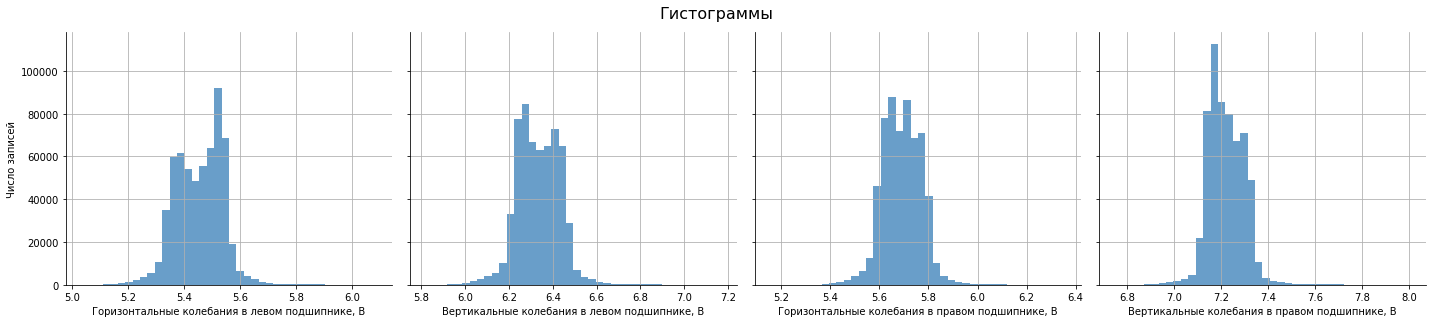

In [ ]:
labels = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing', 'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing']
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 5))
hist_for_atribute_set(d5, labels, ax, bin_num=40)
ax[0].set_ylabel('Число записей')
ax[0].set_xlabel('Горизонтальные колебания в левом подшипнике, В')
ax[1].set_xlabel('Вертикальные колебания в левом подшипнике, В')
ax[2].set_xlabel('Горизонтальные колебания в правом подшипнике, В')
ax[3].set_xlabel('Вертикальные колебания в правом подшипнике, В')
plt.suptitle('Гистограммы', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

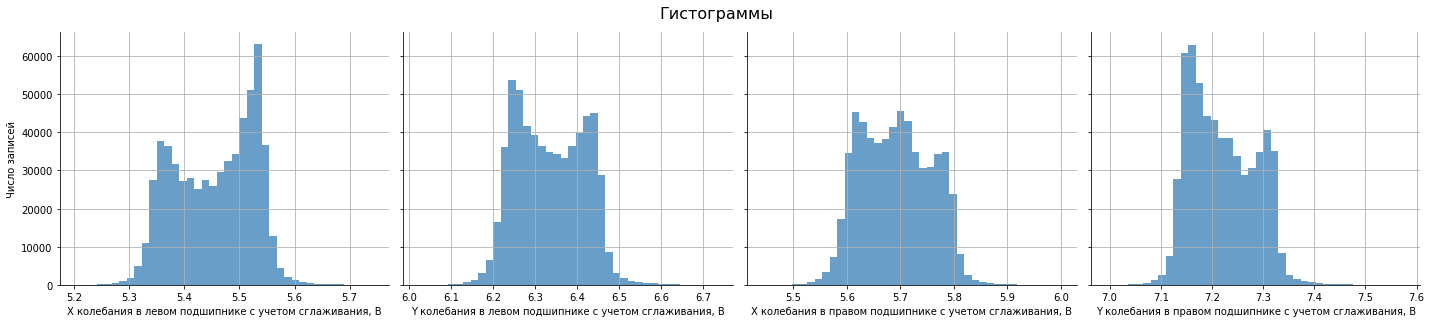

In [ ]:
labels = ['Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth', 'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth']
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 5))
hist_for_atribute_set(d5, labels, ax, bin_num=40)
ax[0].set_ylabel('Число записей')
ax[0].set_xlabel('X колебания в левом подшипнике с учетом сглаживания, В')
ax[1].set_xlabel('Y колебания в левом подшипнике с учетом сглаживания, В')
ax[2].set_xlabel('X колебания в правом подшипнике с учетом сглаживания, В')
ax[3].set_xlabel('Y колебания в правом подшипнике с учетом сглаживания, В')
plt.suptitle('Гистограммы', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

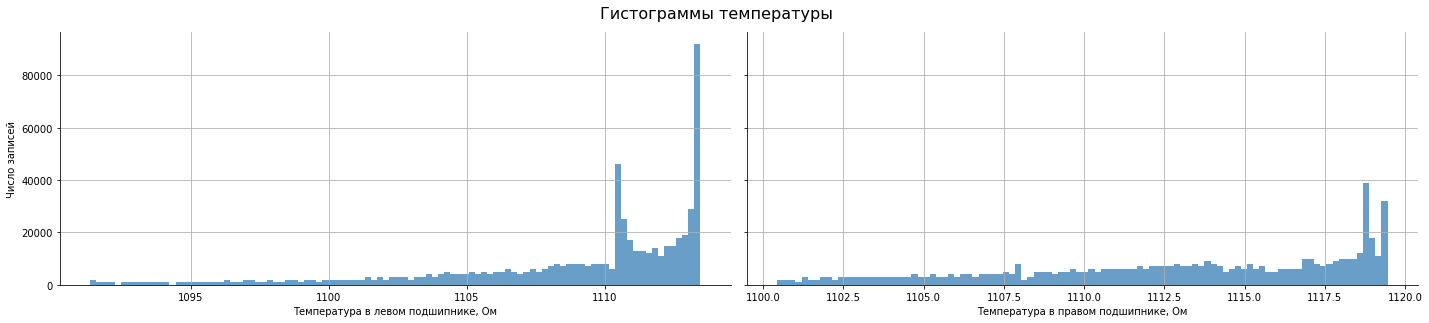

In [ ]:
labels = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 5))
hist_for_atribute_set(d5, labels, ax, bin_num=100)
ax[0].set_ylabel('Число записей')
ax[0].set_xlabel('Температура в левом подшипнике, Ом')
ax[1].set_xlabel('Температура в правом подшипнике, Ом')
plt.suptitle('Гистограммы температуры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

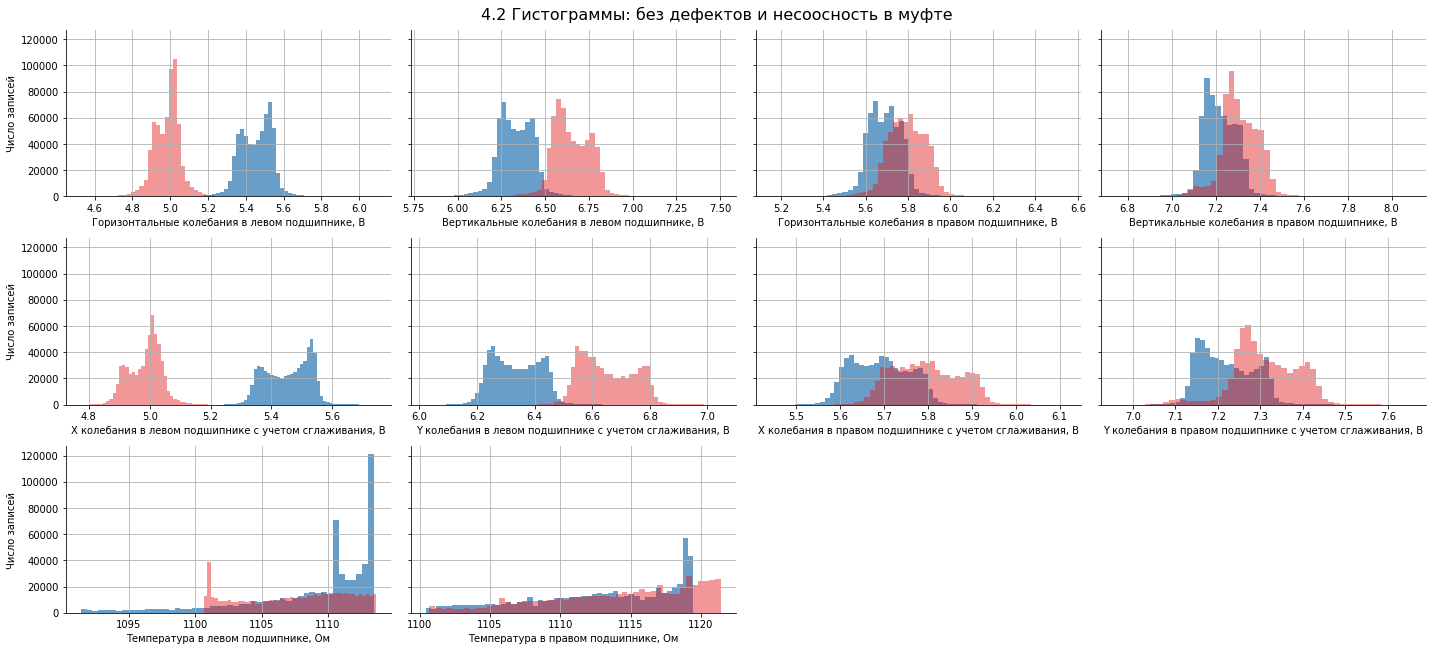

In [ ]:
labels1 = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing', 'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing']
labels2 = ['Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth', 'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth']
labels3 = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']
fig, ax = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(20, 10))

hist_for_atribute_set(d5, labels1, ax[0], bin_num=50, df2= d4_2, y_scale='linear')
hist_for_atribute_set(d5, labels2, ax[1], bin_num=50, df2= d4_2, y_scale='linear')
hist_for_atribute_set(d5, labels3, ax[2], bin_num=50, df2= d4_2, y_scale='linear')

ax[0, 0].set_ylabel('Число записей')
ax[1, 0].set_ylabel('Число записей')
ax[2, 0].set_ylabel('Число записей')
ax[0,0].set_xlabel('Горизонтальные колебания в левом подшипнике, В')
ax[0,1].set_xlabel('Вертикальные колебания в левом подшипнике, В')
ax[0,2].set_xlabel('Горизонтальные колебания в правом подшипнике, В')
ax[0,3].set_xlabel('Вертикальные колебания в правом подшипнике, В')
ax[1,0].set_xlabel('X колебания в левом подшипнике с учетом сглаживания, В')
ax[1,1].set_xlabel('Y колебания в левом подшипнике с учетом сглаживания, В')
ax[1,2].set_xlabel('X колебания в правом подшипнике с учетом сглаживания, В')
ax[1,3].set_xlabel('Y колебания в правом подшипнике с учетом сглаживания, В')
ax[2,0].set_xlabel('Температура в левом подшипнике, Ом')
ax[2,1].set_xlabel('Температура в правом подшипнике, Ом')
plt.suptitle('4.2 Гистограммы: без дефектов и несоосность в муфте', fontsize=16, y=.93)
fig.tight_layout(rect=[0, .03, 1, .95])
plt.show()

Несмотря на разный диапазон в колебаниях, здесь не видго каких-либо разных отклонений. Разный диапазон в колебаниях можно объяснить тем, что это были разные эксперименты (4 опыт и 5 опыт).

Тем не менее, видна большая иная корреляция температуры ко времени.

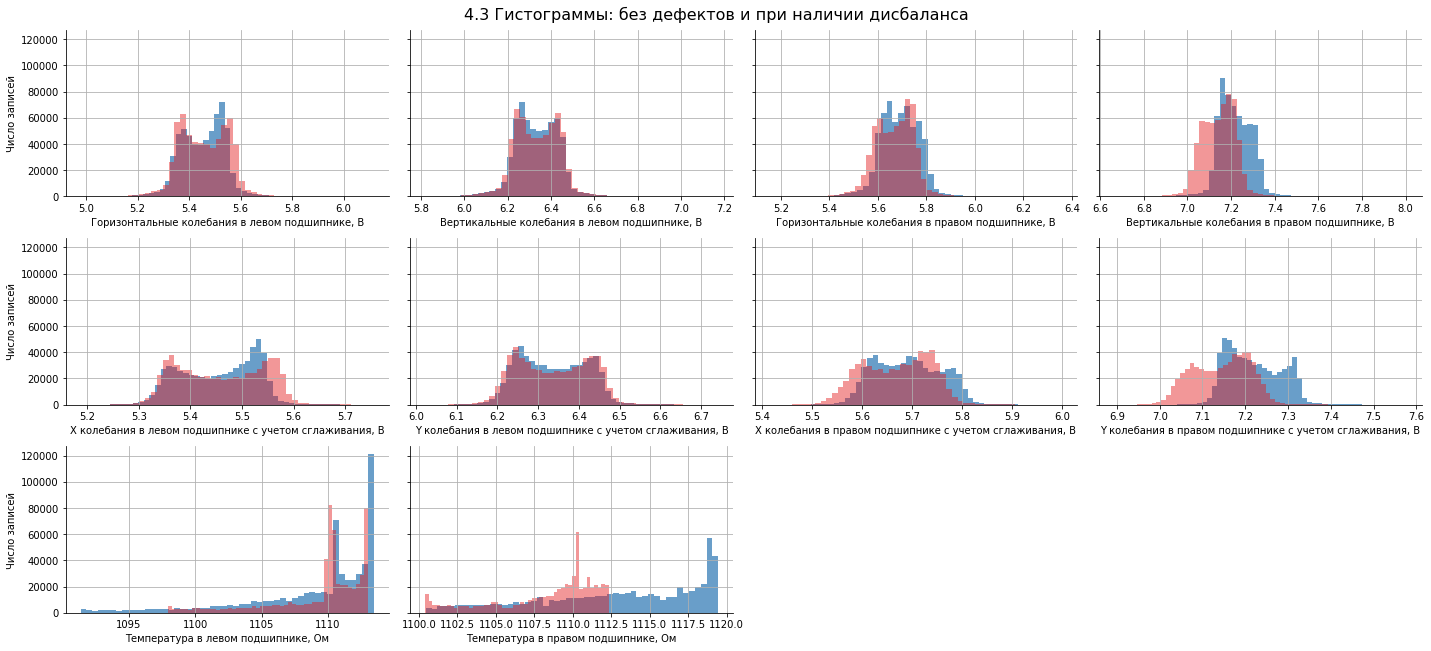

In [ ]:
labels1 = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing', 'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing']
labels2 = ['Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth', 'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth']
labels3 = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']
fig, ax = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(20, 10))

hist_for_atribute_set(d5, labels1, ax[0], bin_num=50, df2= d4_3, y_scale='linear')
hist_for_atribute_set(d5, labels2, ax[1], bin_num=50, df2= d4_3, y_scale='linear')
hist_for_atribute_set(d5, labels3, ax[2], bin_num=50, df2= d4_3, y_scale='linear')

ax[0, 0].set_ylabel('Число записей')
ax[1, 0].set_ylabel('Число записей')
ax[2, 0].set_ylabel('Число записей')
ax[0, 0].set_ylabel('Число записей')
ax[1, 0].set_ylabel('Число записей')
ax[2, 0].set_ylabel('Число записей')
ax[0,0].set_xlabel('Горизонтальные колебания в левом подшипнике, В')
ax[0,1].set_xlabel('Вертикальные колебания в левом подшипнике, В')
ax[0,2].set_xlabel('Горизонтальные колебания в правом подшипнике, В')
ax[0,3].set_xlabel('Вертикальные колебания в правом подшипнике, В')
ax[1,0].set_xlabel('X колебания в левом подшипнике с учетом сглаживания, В')
ax[1,1].set_xlabel('Y колебания в левом подшипнике с учетом сглаживания, В')
ax[1,2].set_xlabel('X колебания в правом подшипнике с учетом сглаживания, В')
ax[1,3].set_xlabel('Y колебания в правом подшипнике с учетом сглаживания, В')
ax[2,0].set_xlabel('Температура в левом подшипнике, Ом')
ax[2,1].set_xlabel('Температура в правом подшипнике, Ом')
plt.suptitle('4.3 Гистограммы: без дефектов и при наличии дисбаланса', fontsize=16, y=.93)
fig.tight_layout(rect=[0, .03, 1, .95])
plt.show()

Тут стоит обратить внимание на гистограмму с температурой в правом подшипнике.

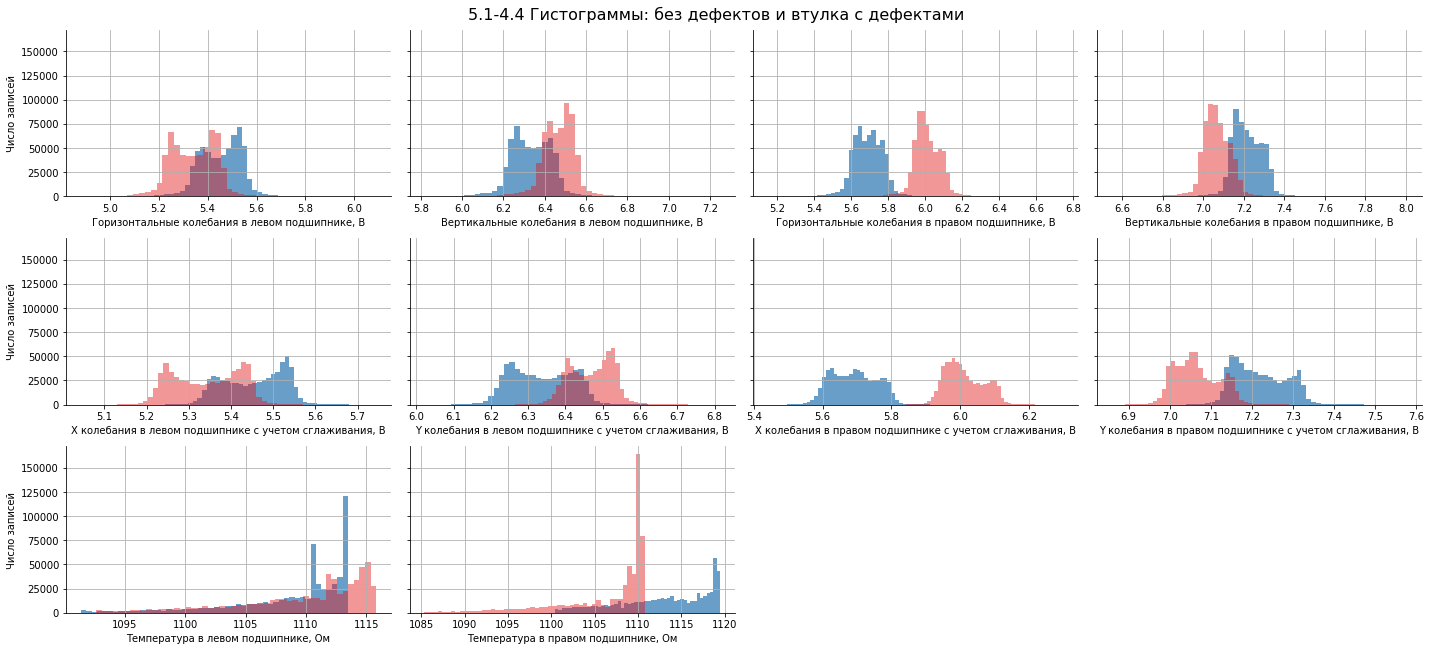

In [ ]:
labels1 = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing', 'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing']
labels2 = ['Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth', 'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth']
labels3 = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']
fig, ax = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(20, 10))

hist_for_atribute_set(d5, labels1, ax[0], bin_num=50, df2= d4_4, y_scale='linear')
hist_for_atribute_set(d5, labels2, ax[1], bin_num=50, df2= d4_4, y_scale='linear')
hist_for_atribute_set(d5, labels3, ax[2], bin_num=50, df2= d4_4, y_scale='linear')

ax[0, 0].set_ylabel('Число записей')
ax[1, 0].set_ylabel('Число записей')
ax[2, 0].set_ylabel('Число записей')
ax[0,0].set_xlabel('Горизонтальные колебания в левом подшипнике, В')
ax[0,1].set_xlabel('Вертикальные колебания в левом подшипнике, В')
ax[0,2].set_xlabel('Горизонтальные колебания в правом подшипнике, В')
ax[0,3].set_xlabel('Вертикальные колебания в правом подшипнике, В')
ax[1,0].set_xlabel('X колебания в левом подшипнике с учетом сглаживания, В')
ax[1,1].set_xlabel('Y колебания в левом подшипнике с учетом сглаживания, В')
ax[1,2].set_xlabel('X колебания в правом подшипнике с учетом сглаживания, В')
ax[1,3].set_xlabel('Y колебания в правом подшипнике с учетом сглаживания, В')
ax[2,0].set_xlabel('Температура в левом подшипнике, Ом')
ax[2,1].set_xlabel('Температура в правом подшипнике, Ом')
plt.suptitle('5.1-4.4 Гистограммы: без дефектов и втулка с дефектами', fontsize=16, y=.93)
fig.tight_layout(rect=[0, .03, 1, .95])
plt.show()

В последней тоже есть разница с температурой.

В качестве метки нормы логичнее будет взять температуру в левом и правом подшипнике.

Text(0, 0.5, 'Температура, Ом')

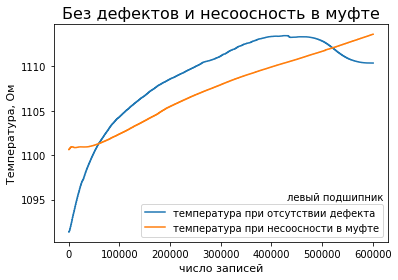

In [ ]:
d5['Temperature_in_the_left_bearing'].plot(label='температура при отсутствии дефекта');
d4_2['Temperature_in_the_left_bearing'].plot(label='температура при несоосности в муфте');
plt.title('Без дефектов и несоосность в муфте', fontsize=16)
plt.text(430000, 1095, 'левый подшипник')
plt.legend()
plt.xlabel('число записей', fontsize=11)
plt.ylabel('Температура, Ом', fontsize=11)

Text(0, 0.5, 'Температура, Ом')

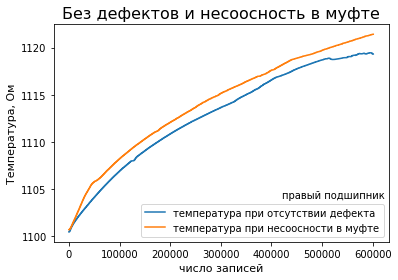

In [ ]:
d5['Temperature_in_the_right_bearing'].plot(label='температура при отсутствии дефекта');
d4_2['Temperature_in_the_right_bearing'].plot(label='температура при несоосности в муфте');
plt.title('Без дефектов и несоосность в муфте', fontsize=16)
plt.text(420000, 1104, 'правый подшипник')
plt.legend()
plt.xlabel('число записей', fontsize=11)
plt.ylabel('Температура, Ом', fontsize=11)

Text(0, 0.5, 'Температура, Ом')

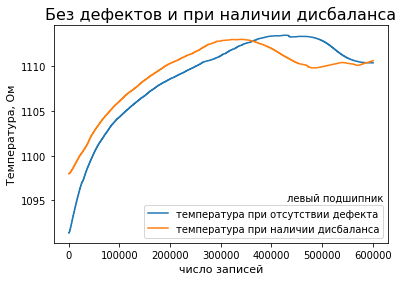

In [ ]:
d5['Temperature_in_the_left_bearing'].plot(label='температура при отсутствии дефекта');
d4_3['Temperature_in_the_left_bearing'].plot(label='температура при наличии дисбаланса');
plt.title('Без дефектов и при наличии дисбаланса', fontsize=16)
plt.text(430000, 1095, 'левый подшипник')
plt.legend()
plt.xlabel('число записей', fontsize=11)
plt.ylabel('Температура, Ом', fontsize=11)

Text(0, 0.5, 'Температура, Ом')

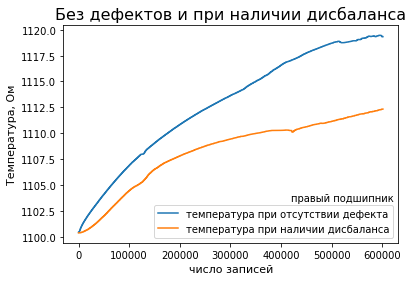

In [ ]:
d5['Temperature_in_the_right_bearing'].plot(label='температура при отсутствии дефекта');
d4_3['Temperature_in_the_right_bearing'].plot(label='температура при наличии дисбаланса');
plt.title('Без дефектов и при наличии дисбаланса', fontsize=16)
plt.text(420000, 1103.5, 'правый подшипник')
plt.legend()
plt.xlabel('число записей', fontsize=11)
plt.ylabel('Температура, Ом', fontsize=11)

Text(0, 0.5, 'Температура, Ом')

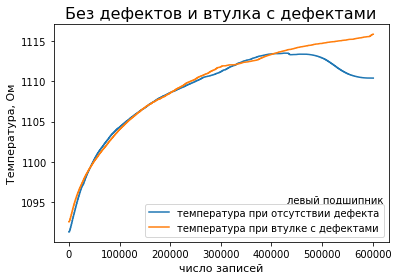

In [ ]:
d5['Temperature_in_the_left_bearing'].plot(label='температура при отсутствии дефекта');
d4_4['Temperature_in_the_left_bearing'].plot(label='температура при втулке с дефектами');
plt.title('Без дефектов и втулка с дефектами', fontsize=16)
plt.text(430000, 1095, 'левый подшипник')
plt.legend()
plt.xlabel('число записей', fontsize=11)
plt.ylabel('Температура, Ом', fontsize=11)

Text(0, 0.5, 'Температура, Ом')

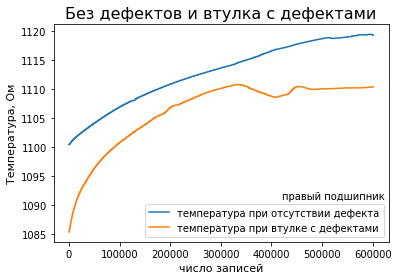

In [ ]:
d5['Temperature_in_the_right_bearing'].plot(label='температура при отсутствии дефекта');
d4_4['Temperature_in_the_right_bearing'].plot(label='температура при втулке с дефектами');
plt.title('Без дефектов и втулка с дефектами', fontsize=16)
plt.text(420000, 1091, 'правый подшипник')
plt.legend()
plt.xlabel('число записей', fontsize=11)
plt.ylabel('Температура, Ом', fontsize=11)

Посмотрев на графики, можно сделать несколько заметок.

При несоосности в муфте явно видно, что в левом подшипнике температура ведя себя отлично от нормы.

При наличии дисбаланса температура в обеих подшипниках отлична от нормы (причем в правом отличие явно более выраженное).

При втулке с дефектами в правом подшипнике температура видна совсем иная.